In [67]:
## Importing labraries for text analyses


import pandas as pd
import re
import string
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords


nltk.download("wordnet")
stopwords = set(stopwords.words("english"))

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from matplotlib import rcParams

from nltk.tokenize import word_tokenize

rcParams["figure.figsize"] = 20,20
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objs as go


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maart\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
train = pd.read_csv(r"C:\Users\maart\OneDrive\Bureaublad\NLP\train.csv", index_col="id")
test = pd.read_csv(r"C:\Users\maart\OneDrive\Bureaublad\NLP\test.csv",index_col="id")
submission = pd.read_csv(r"C:\Users\maart\OneDrive\Bureaublad\NLP\sample_submission.csv", index_col="id")

In [4]:
train

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


In [5]:

train = train.drop(["keyword","location"], axis = 1)
test = test.drop(["keyword","location"], axis = 1)

In [6]:
shape_of_train =train.shape
shape_of_test = test.shape

print(f"There are {shape_of_train[0]} rows and {shape_of_train[1]} columns in the trainset")
print(f"There are {shape_of_test[0]} rows and {shape_of_test[1]} columns in the trainset")

There are 7613 rows and 2 columns in the trainset
There are 3263 rows and 1 columns in the trainset


In [73]:
def get_wordnet_pos(woord):
    tag = nltk.pos_tag([woord])[0][1][0]
    tag_dict =  {"J": wordnet.ADJ,
             "N":wordnet.NOUN,
             "V":wordnet.VERB,
             "R":wordnet.ADV}
    
    return tag_dict.get(tag,wordnet.NOUN)
    

In [74]:
def cleaning_Text(text):
    # cleaning the text 
    text = text.lower() # Make The text lower
    text = re.sub("https?://\S+|www\.S+"," ",text) # removes all links
    text = re.sub("<.*?>"," ", text) # removes all html 
    text = re.sub("\[.*?\]"," ",text) # removes brackets
    text = re.sub("\w*\d\w*"," ", text) # removes words with numbers
    text = re.sub("\n"," ",text)
    return text
        
def remove_punct(text):
    
    table =str.maketrans('','',string.punctuation) # removes punctuation
    return text.translate(table)
    
    
def Remove_emoji(text):
    emoji_pattern = re.compile(pattern = "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        "]+", flags = re.UNICODE)
    text = emoji_pattern.sub(r'',text)
    
    return text
    
    

In [9]:
train["text"]  = train["text"].apply(cleaning_Text)
test["text"]  = test["text"].apply(cleaning_Text)

In [10]:
train["text"] = train["text"].apply(remove_punct)
test["text"] = test["text"].apply(remove_punct)

In [11]:
lem = WordNetLemmatizer()

In [12]:
def Lemmatizer(text):
    text1 = word_tokenize(text)
    text1 = [lem.lemmatize(word, get_wordnet_pos(word)) for word in text1]
    return " ".join(text1)


In [13]:
train["text"]  = train["text"].apply(Lemmatizer)
test["text"]  = test["text"].apply(Lemmatizer)



In [14]:
train["text"]  = train["text"].apply(Remove_emoji)
test["text"]  = test["text"].apply(Remove_emoji)

In [15]:
test

,text
id,
0,just happened a terrible car crash
2,heard about earthquake is different cities sta...
3,there is a forest fire at spot pond geese are ...
9,apocalypse lighting spokane wildfires
11,typhoon soudelor kills in china and taiwan
...,...
10861,earthquake safety los angeles ûò safety faste...
10865,storm in ri worse than last hurricane my citya...
10868,green line derailment in chicago


In [16]:
count = train["target"].value_counts()

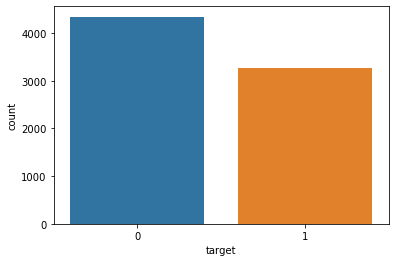

In [17]:
ax = sns.countplot(train["target"]);


In [18]:
round(train["target"].value_counts(normalize=True) * 100,2) 

0    57.03
1    42.97
Name: target, dtype: float64

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
trainii = " ".join(train[train["target"]== 1] ["text"])
traini  = " ".join(train[train["target"]==0] ["text"])

In [75]:
false = WordCloud(height=500, width = 500, background_color="black", stopwords=stopwords).generate(trainii)
positive = WordCloud(height=500, width = 500,background_color="black", stopwords=stopwords).generate(traini)


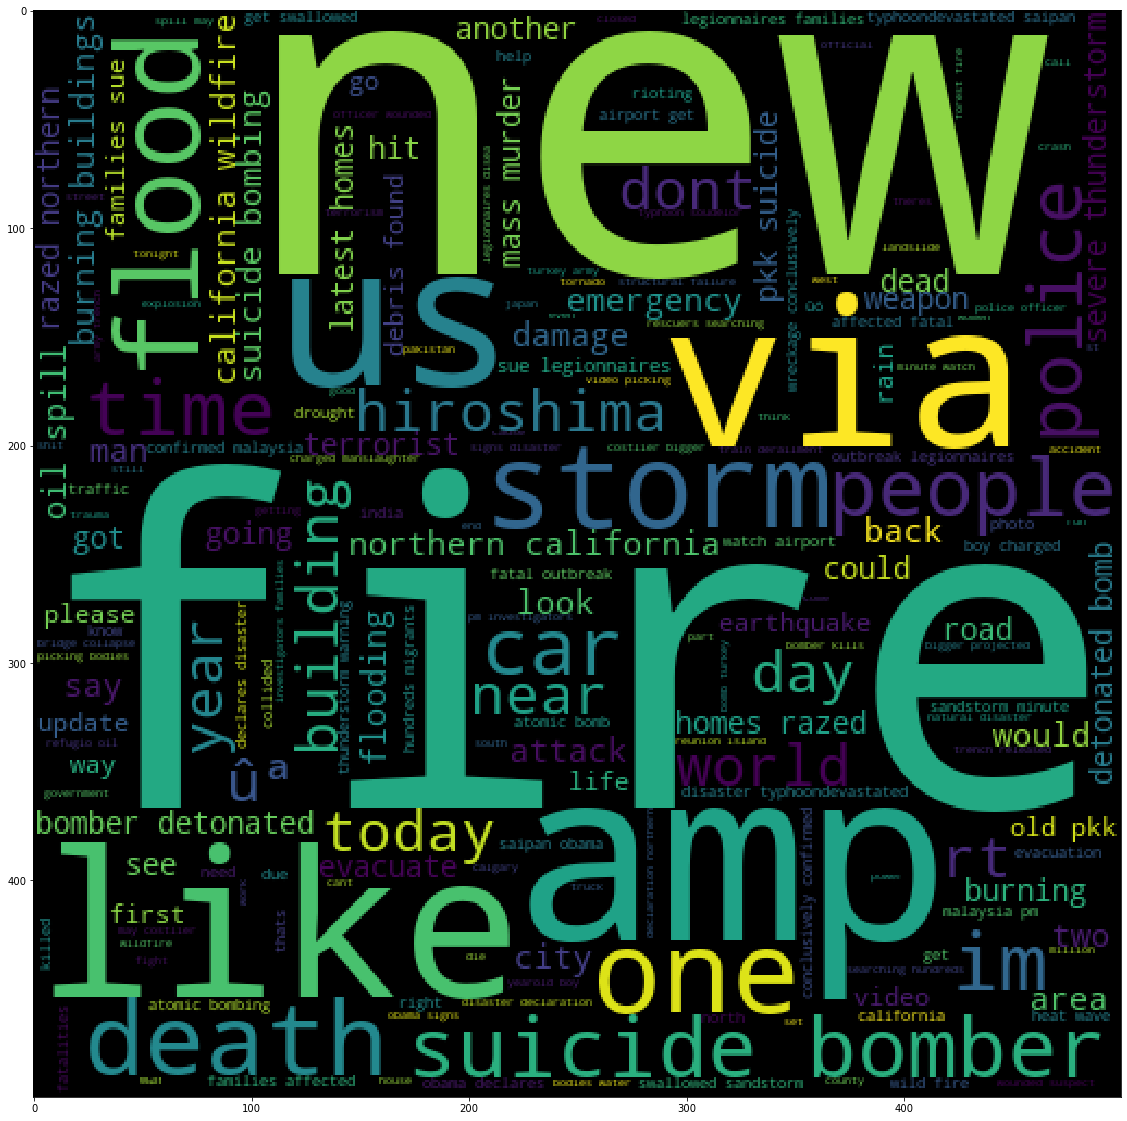

<Figure size 720x720 with 0 Axes>

In [76]:
# ALL THE FALSE TWEETS
plt.imshow(false); 
plt.figure(figsize=(10,10));

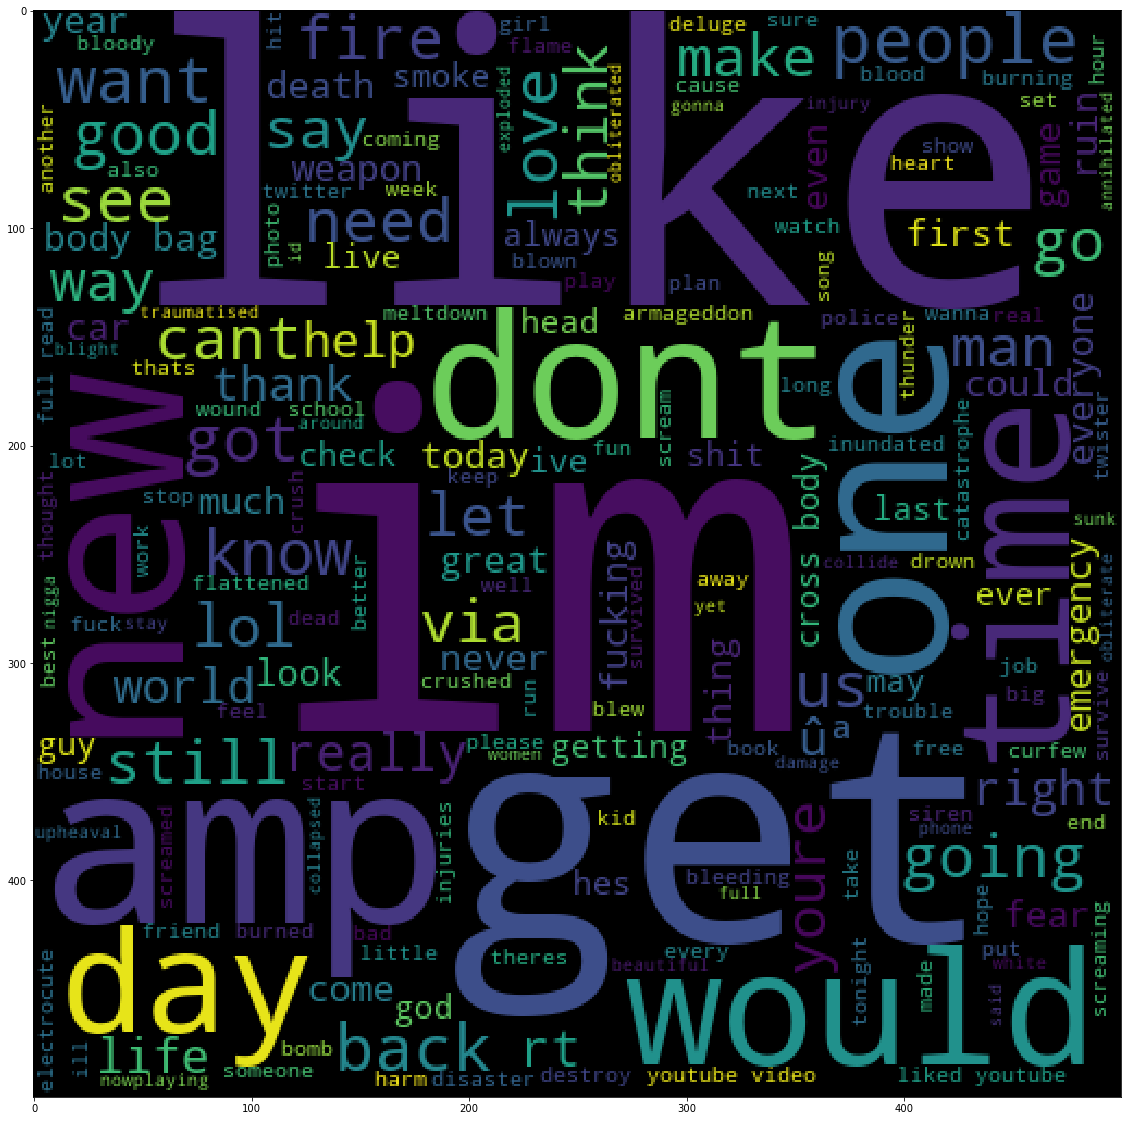

<Figure size 720x720 with 0 Axes>

In [77]:
# ALL THE POSITIVE TWEETS
plt.imshow(positive);
plt.figure(figsize=(10,10));

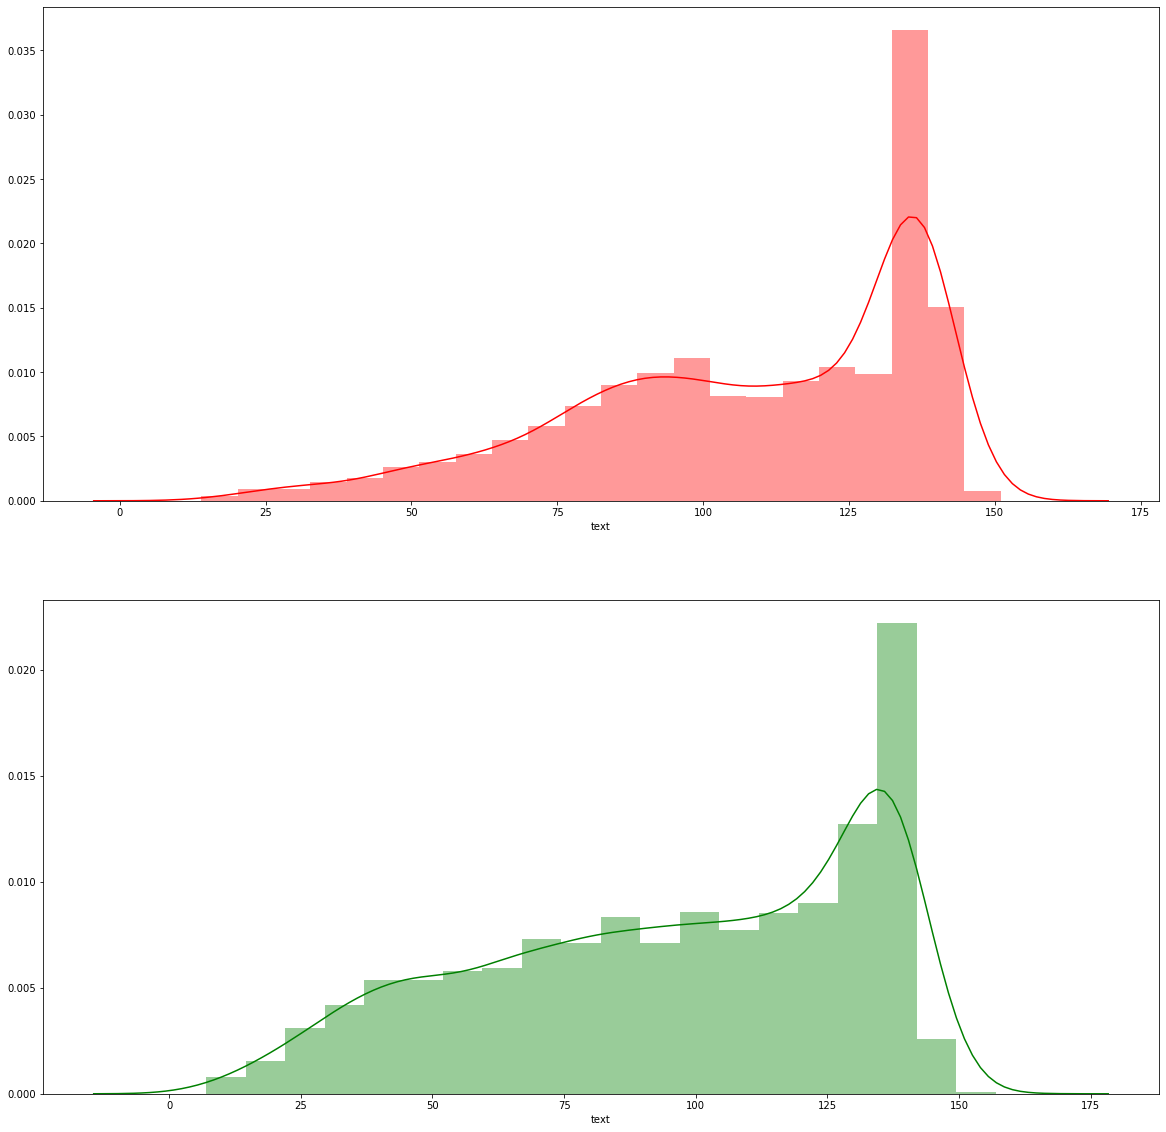

In [78]:
fig, (ax1, ax2) = plt.subplots(2,1)
len_Neg= train[train["target"]== 1]["text"].str.len()
sns.distplot(len_Neg, ax= ax1 , color = "r")

len_Pos= train[train["target"]== 0]["text"].str.len()
sns.distplot(len_Pos, ax= ax2, color="green")

In [79]:
def Top_words_2(text, n = None):
    
    vec = CountVectorizer(ngram_range=(2,2)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_Freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_Freq = sorted(words_Freq, key = lambda x: x[1], reverse=True)
    return words_Freq[:n]
    

In [80]:
Top_words_2(train[train["target"]==1]["text"], n = 20)

[('http co', 2382),
 ('in the', 145),
 ('https co', 134),
 ('of the', 119),
 ('û_ http', 109),
 ('suicide bomber', 59),
 ('on the', 51),
 ('more than', 43),
 ('at the', 42),
 ('have been', 42),
 ('by the', 42),
 ('northern california', 41),
 ('and the', 38),
 ('from mh370', 38),
 ('oil spill', 38),
 ('killed in', 37),
 ('to the', 36),
 ('the latest', 36),
 ('the fatal', 36),
 ('suicide bombing', 35)]

In [81]:
Top_words_2(train[train["target"]==0]["text"], n = 20)

[('http co', 1924),
 ('https co', 276),
 ('in the', 163),
 ('of the', 137),
 ('û_ http', 108),
 ('to the', 90),
 ('on the', 78),
 ('to be', 73),
 ('for the', 64),
 ('if you', 59),
 ('you re', 58),
 ('is the', 48),
 ('going to', 48),
 ('at the', 43),
 ('and the', 41),
 ('cross body', 39),
 ('you are', 38),
 ('want to', 38),
 ('will be', 38),
 ('when you', 37)]

In [82]:
def Top_words_3(text, n = None):
    
    vec = CountVectorizer(ngram_range=(3,3)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_Freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_Freq = sorted(words_Freq, key = lambda x: x[1], reverse=True)
    return words_Freq[:n]
    

In [83]:
Top_words_3(train[train["target"]==1]["text"], n = 20)

[('û_ http co', 109),
 ('northern california wildfire', 29),
 ('more homes razed', 29),
 ('homes razed by', 29),
 ('the latest more', 28),
 ('latest more homes', 28),
 ('razed by northern', 28),
 ('pkk suicide bomber', 28),
 ('suicide bomber who', 28),
 ('bomber who detonated', 28),
 ('who detonated bomb', 28),
 ('detonated bomb in', 28),
 ('by northern california', 27),
 ('16yr old pkk', 27),
 ('old pkk suicide', 27),
 ('families to sue', 26),
 ('to sue over', 26),
 ('sue over legionnaires', 26),
 ('more than 40', 26),
 ('than 40 families', 26)]

In [84]:
Top_words_3(train[train["target"]==0]["text"], n = 20)

[('û_ http co', 108),
 ('liked youtube video', 35),
 ('video http co', 27),
 ('full re û_', 25),
 ('re û_ http', 25),
 ('û_ https co', 24),
 ('reddit will now', 21),
 ('will now quarantine', 21),
 ('full read by', 20),
 ('ebay http co', 19),
 ('youtube video http', 19),
 ('for http co', 19),
 ('cross body bag', 19),
 ('now quarantine offensive', 19),
 ('quarantine offensive content', 18),
 ('is my pick', 17),
 ('my pick for', 17),
 ('pick for http', 17),
 ('youtube video from', 17),
 ('here http co', 16)]

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [87]:
tf = TfidfVectorizer()
next = tf.fit_transform(train["text"])

In [88]:
next

<7613x21637 sparse matrix of type '<class 'numpy.float64'>'
	with 111497 stored elements in Compressed Sparse Row format>

In [89]:

y = train["target"]


In [90]:
# split the dataframe
X_train, X_test, y_train, y_test =train_test_split(next,y , test_size =0.2, random_state = 42, shuffle = False)

In [91]:
# importing the modes

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [92]:

classifiers = {
    "Logistic_regression" : LogisticRegression(),
    "Desicion_tree_classifier": DecisionTreeClassifier(),
    "XGBClassifier": XGBClassifier(),
    "SVC": SVC(),
    "RF": RandomForestClassifier(),
    "GradientBoostclas": GradientBoostingClassifier(),
    "Adaboost classifier" : AdaBoostClassifier()
}

In [93]:
# which model has the best acc score
for key, classifier in classifiers.items():
   
    classifier.fit(X_train,y_train)
    score = cross_val_score(classifier, X_train,y_train, cv=5).mean()
    print(f"classifier: {key}  {round(score,2)}")

classifier: Logistic_regression  0.72
classifier: Desicion_tree_classifier  0.63
classifier: XGBClassifier  0.66
classifier: SVC  0.71
classifier: RF  0.67
classifier: GradientBoostclas  0.67
classifier: Adaboost classifier  0.67


In [94]:
import numpy as np

In [95]:
params = {
         "C": [0.001,0.01,0.1,1,10,100,150],
        "penalty":['l1',"l2"]}

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
# Hyperparameter tuning 
log = LogisticRegression()
grid = GridSearchCV(log, param_grid=params)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'C': 1, 'penalty': 'l2'}


In [ ]:
#The model 
logi = LogisticRegression(C = 1, penalty="l2")
logi.fit(X_train,y_train)
predict = logi.predict(X_test)
score = round(accuracy_score(y_test,predict),2)
print(f"The logistic regression score is: {score}")